In [1]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import numpy

In [2]:
bed_file_path="../../data/DBA2J/bed/r64089e.minimap2-sniffles.bed"
col_names=["chromosome", "len", "type"]
data = pd.read_csv(bed_file_path, sep='\t', header=None, usecols=[0,3,4], names=col_names)

### Distribution by chromosome:

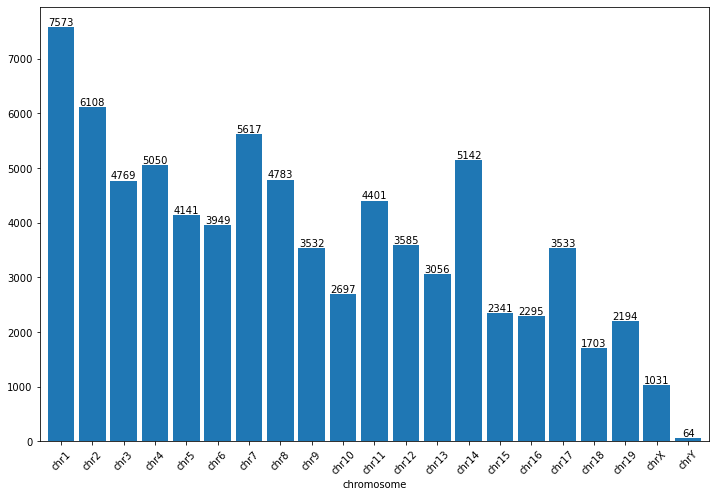

In [3]:
plot_data=data.groupby("chromosome").size().sort_index(key=lambda x: x.map(lambda v: int(v[3:].replace("X","99").replace("Y","100"))))
ax = plot_data.plot.bar(figsize=(12,8), width=0.85, rot=45)
ax = ax.bar_label(ax.containers[0])

### Distriution by chromosome & type:

type,DEL,DEL/INV,DUP,INS,INV,INVDUP
chromosome,,,,,,
chr1,3659,74,11,3806,23,0
chr2,2817,45,6,3221,19,0
chr3,2401,30,3,2323,11,1
chr4,2447,36,6,2550,11,0
chr5,1980,25,3,2120,13,0
chr6,1900,31,5,2003,10,0
chr7,2611,48,6,2931,21,0
chr8,2430,42,6,2288,16,1
chr9,1691,35,5,1792,9,0


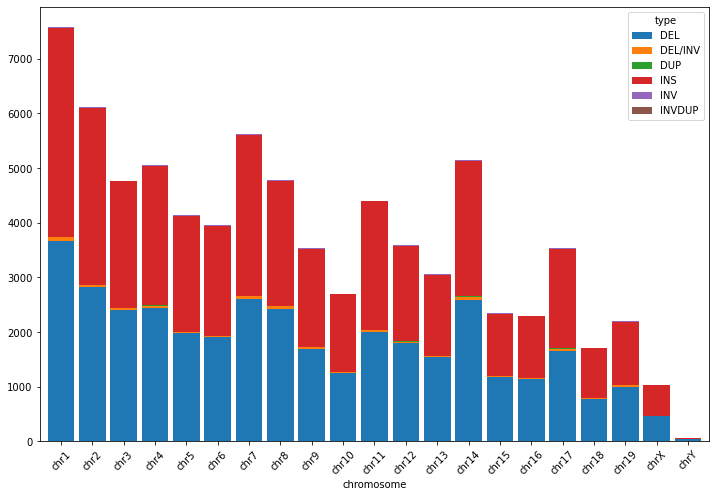

In [5]:
plot_data=data.groupby(["chromosome","type"])["chromosome"].size().unstack("type").fillna(0).sort_index(key=lambda x: x.map(lambda v: int(v[3:].replace("X","99").replace("Y","100")))).astype('int32')
ax = plot_data.plot.bar(figsize=(12,8), width=0.85, stacked=True, rot=45)
# for c in ax.containers:
#     ax.bar_label(c, label_type='center')
plot_data

### Distribution by size (variable ranges):

In [15]:
grouped_data=data.groupby(["len","type"])["len"].count().unstack("type").fillna(0)
grouped_data["sum"] = grouped_data.sum(axis=1)
# grouped_data

In [17]:
min_count=1000
min_distance=100

size_data = pd.DataFrame(columns=('DEL', 'DEL/INV', 'DUP', 'INS', 'INV', 'INVDUP','sum'))

distance=1

start=str(data.min()["len"])
end=str(data.min()["len"])
final=str(data.max()["len"])

row_data=pd.Series([0,0,0,0,0,0,0], index=['DEL', 'DEL/INV', 'DUP', 'INS', 'INV', 'INVDUP', 'sum'])

for row in grouped_data.iterrows():
    count=row_data["sum"]
    values=row[1]
    end=str(row[0])
    
    row_data+=values
    
    if distance>=min_distance and count>= min_count:
        size_data.loc[start+"-"+end] = row_data
        distance=1
        start=end
        row_data=pd.Series([0,0,0,0,0,0,0], index=['DEL', 'DEL/INV', 'DUP', 'INS', 'INV', 'INVDUP', 'sum'])
    else:
        distance+=1

size_data.loc[start+"-"+final] = row_data
        
size_data

,DEL,DEL/INV,DUP,INS,INV,INVDUP,sum
31-130,20524.0,7.0,1.0,23253.0,1.0,0.0,43786.0
130-230,5196.0,27.0,5.0,5898.0,11.0,0.0,11137.0
230-330,1445.0,45.0,1.0,1871.0,8.0,0.0,3370.0
330-430,1183.0,54.0,0.0,1343.0,10.0,1.0,2591.0
430-530,888.0,54.0,4.0,1032.0,9.0,0.0,1987.0
530-630,541.0,50.0,2.0,597.0,7.0,0.0,1197.0
630-739,468.0,54.0,1.0,479.0,7.0,0.0,1009.0
739-876,469.0,61.0,1.0,473.0,7.0,0.0,1011.0
876-1045,456.0,62.0,1.0,482.0,8.0,0.0,1009.0
1045-1265,487.0,63.0,2.0,439.0,12.0,0.0,1003.0


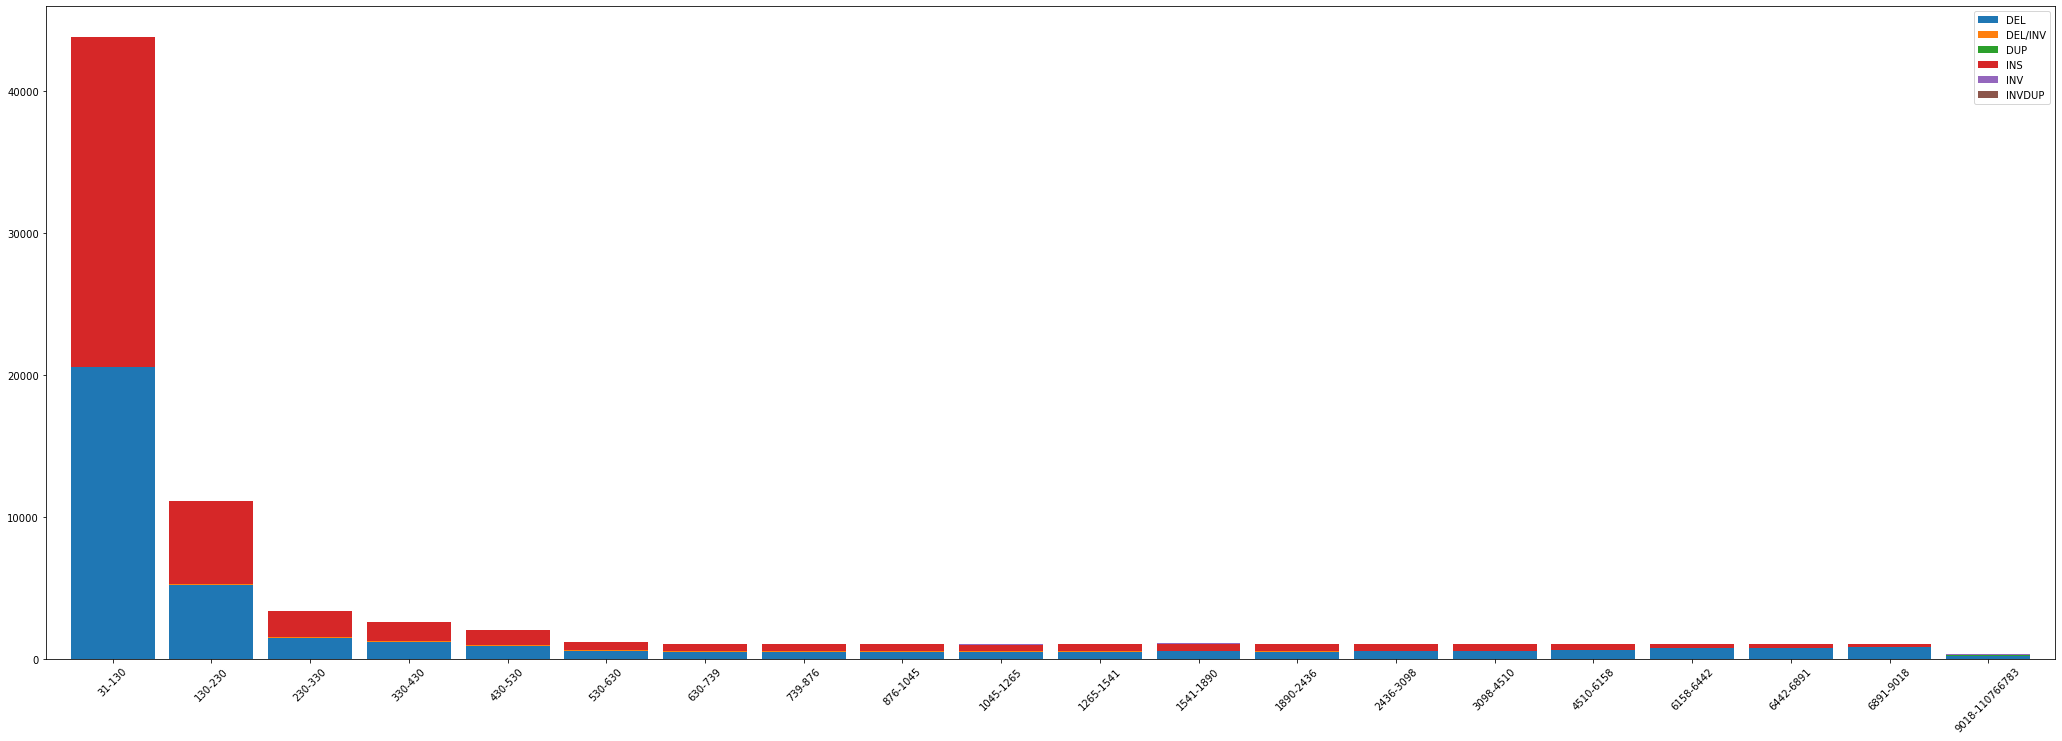

In [18]:
final_size_data=size_data.drop(['sum'], axis=1)
ax = final_size_data.plot.bar(figsize=(36,12), width=0.85, stacked=True, rot=45)